In [21]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister,ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

RequestsApiError: "('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))"

In [9]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
# q[0] will represent the unknown state. q[1] and q[2] will be the entangled Qubits

In [10]:
# Here we prepare q[0]
qc.x(0)  # Add not gate to q[0]
qc.z(0) # Add Z gate tp q[0]
qc.barrier() # Out here we do it to simplify our visualization

In [11]:
#Here Alice will entangle q[1] and q[2]
qc.h(1)
qc.cx(1,2)
qc.barrier()

In [12]:
# Here Alice will entangle the qubit in the psi state that was entangled with bob's
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.cx(1,2)
qc.barrier()

In [14]:
qc.z(2)
qc.x(2)
qc.measure(2,2)

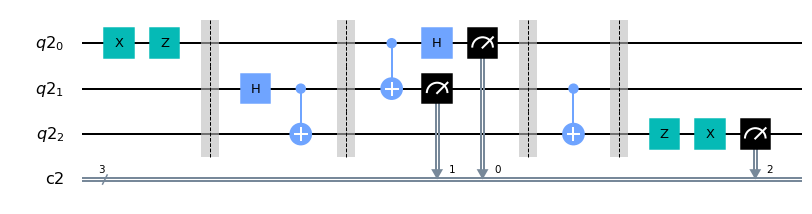

In [15]:
qc.draw(output='mpl')

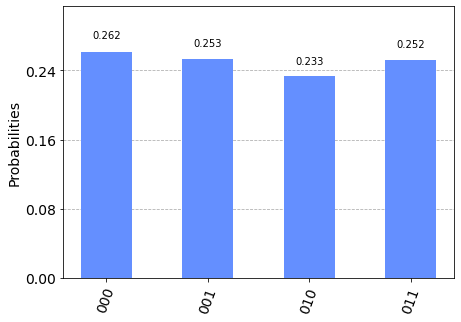

In [17]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job_result = job.result()
results = job_result.get_counts(qc)
plot_histogram(results)

In [18]:
qc.qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q2[3];\ncreg c2[3];\nx q2[0];\nz q2[0];\nbarrier q2[0],q2[1],q2[2];\nh q2[1];\ncx q2[1],q2[2];\nbarrier q2[0],q2[1],q2[2];\ncx q2[0],q2[1];\nh q2[0];\nmeasure q2[0] -> c2[0];\nmeasure q2[1] -> c2[1];\nbarrier q2[0],q2[1],q2[2];\ncx q2[1],q2[2];\nbarrier q2[0],q2[1],q2[2];\nz q2[2];\nx q2[2];\nmeasure q2[2] -> c2[2];\n'